<h1 style="color: red"> Vamos a trer desde Drive :  </h1>
<h5> DataBase (Todas las imagenes) </h5>

In [1]:
import shutil

shutil.copy("/content/drive/MyDrive/1a<-----ITM---->Universidad/2023/Sistemas Inteligentes/1. Aaaa--->Jaime 2023/Entrega2/PruebasPlatzi/PrimeraNota/DataBase.zip","/content")

print("Descomprime el DataBase.zip")

Descomprime el DataBase.zip


In [2]:
import zipfile
local_zip = "/content/DataBase.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/content/DataBase")
zip_ref.close()

<h1> Mostrar las imagenes </h1>

In [3]:
import pandas as pd
import json
import pickle
import zipfile
import os
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import json
import pickle
import zipfile

!pip install tf_slim


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


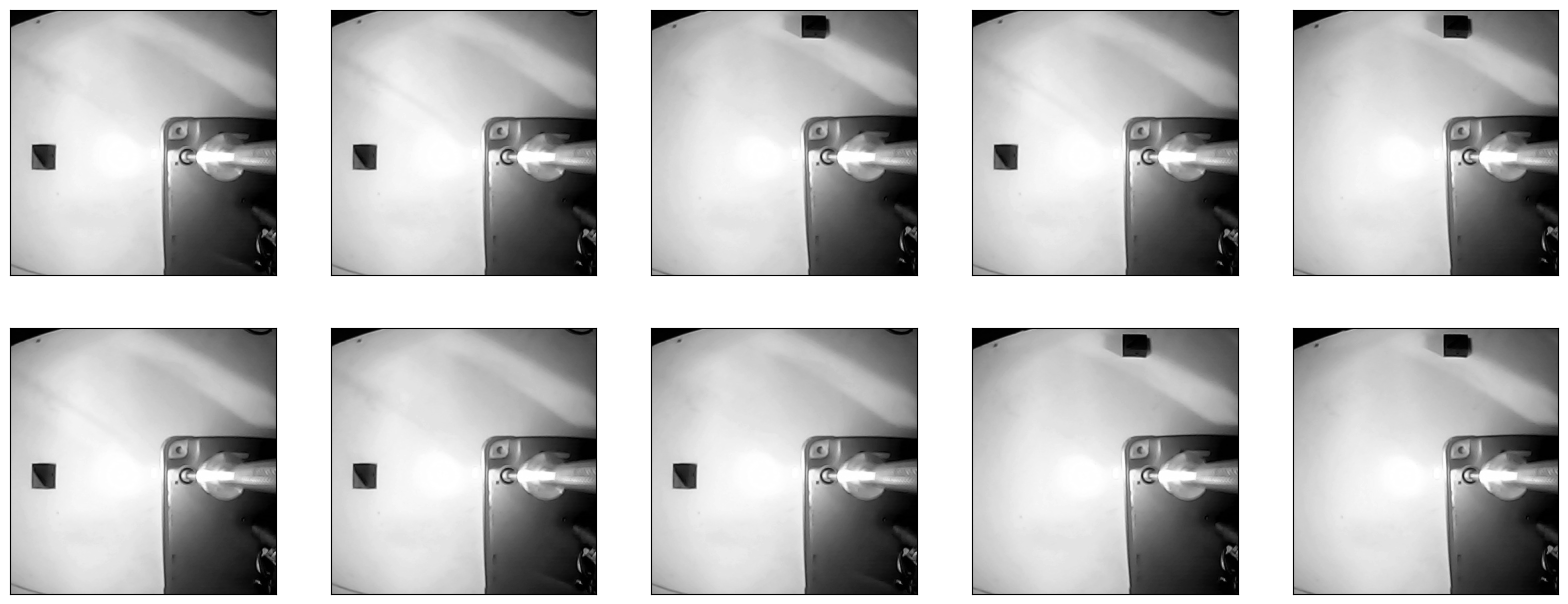

In [4]:
#Jaime

path_imagenes = '/content/DataBase/DataBase'

contenido = os.listdir(path_imagenes)

# for jaime in range( int( len(contenido) ) ):
#   if (jaime < 15):
#     b = (str(contenido[jaime])) 
#     image = io.imread('/content/DataBase/DataBase/{}'.format(b) )
#     plt.imshow(image,cmap='gray')
#     plt.axis('off')
#     plt.show()
plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(5, 5, i+1)
  b = (str(contenido[i])) 
  image = io.imread('/content/DataBase/DataBase/{}'.format(b) )
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image, cmap="gray")

Vamos generar datos de manera randomica 70% 30%

In [5]:
path = "/content/DataBase/DataBase"
content = os.listdir( path )#Crear una lista en esta variable

In [ ]:
content

Vamos a crear dos carpetas una de ellas va a contener el 70% y la otra el 30%

In [7]:
path_general = "datasetFinal" # VAn a estar alojadas las carpetas "Training" & "Test"
path_train = "{}/train".format( path_general )
path_test = "{}/test".format( path_general )

os.mkdir( path_general )
os.mkdir( path_train )
os.mkdir( path_test )


In [8]:
from IPython.utils.text import Path
import random 
import shutil

train = 0.7
for nCOunt in range( int( len(content)*train ) ):
  random_choice_img = random.choice( content )
  random_choice_img_abs = "{}/{}".format( path, random_choice_img )
  target_img = "{}/{}".format( path_train, random_choice_img )
  shutil.copyfile(random_choice_img_abs, target_img)#Copiar de dónde viene la imagen y hacia dónde va                                    
  content.remove(random_choice_img)

In [9]:
for img in content:
  random_choice_img_abs = "{}/{}".format(path, img)#Destino
  target_img = "{}/{}".format( path_test, img )#HAcia dónde va
  shutil.copyfile( random_choice_img_abs, target_img ) 

Para descargar la base de datos

In [ ]:
!zip -r /content/datasetFinal.zip /content/datasetFinal

<h1> SEGUNDA PARTE: DEFINIR LAS CARACTERÍSTICAS </h1>

TFRecords para train traerlo desde Drive, ya etiquetadas con linkedAI

In [11]:
import shutil

shutil.copy("/content/drive/MyDrive/1a<-----ITM---->Universidad/2023/Sistemas Inteligentes/1. Aaaa--->Jaime 2023/Entrega2/PruebasPlatzi/PrimeraNota/train.json","/content")

print("No Descomprime el train.zip")

No Descomprime el train.zip


In [12]:
type_file = "train"
path = "/content/train.json"
data_file = open(path)
data = json.load(data_file)

In [ ]:
data

In [14]:
csv_list = []

for classification in data:
  width, height = classification['width'], classification['height']
  image = classification['image']
  for item in classification['tags']:
    name = item['name']
    xmin = item['pos']['x']
    ymin = item['pos']['y']
    xmax = item['pos']['x'] + item['pos']['w']
    ymax = item['pos']['y'] + item['pos']['h']

    value = (image, width, height, name, xmin, ymin, xmax, ymax)
    csv_list.append(value)
#Generar archivo csv
column_name = ['filename','width','height','class','xmin','ymin','xmax','ymax']
csv_df = pd.DataFrame(csv_list, columns = column_name)

csv_df.to_csv("/content/{}_labels.csv".format(type_file))

#Jaime
print("Genera el archivo csv llamado :  train_labels.csv   ")

Genera el archivo csv llamado :  train_labels.csv   



Ver que tiene el archivo !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [ ]:
import csv
f= open("/content/train_labels.csv")
reader = csv.reader(f)
for row in reader:
    print (row)  

In [16]:
%%html
<h1 style="color: red;"> TFRecords para TEST traerlo desde Drive, ya etiquetadas con linkedAI </h1>

In [17]:
import shutil

shutil.copy("/content/drive/MyDrive/1a<-----ITM---->Universidad/2023/Sistemas Inteligentes/1. Aaaa--->Jaime 2023/Entrega2/PruebasPlatzi/PrimeraNota/test.json","/content")

print("NO Descomprime el TEST.zip")

NO Descomprime el TEST.zip


In [18]:
type_file = "test"
path = "/content/test.json"
data_file = open(path)
data = json.load(data_file)

In [ ]:
data

In [20]:
csv_list = []

for classification in data:
  width, height = classification['width'], classification['height']
  image = classification['image']
  for item in classification['tags']:
    name = item['name']
    xmin = item['pos']['x']
    ymin = item['pos']['y']
    xmax = item['pos']['x'] + item['pos']['w']
    ymax = item['pos']['y'] + item['pos']['h']

    value = (image, width, height, name, xmin, ymin, xmax, ymax)
    csv_list.append(value)
#Generar archivo csv
column_name = ['filename','width','height','class','xmin','ymin','xmax','ymax']
csv_df = pd.DataFrame(csv_list, columns = column_name)

csv_df.to_csv("/content/{}_labels.csv".format(type_file))

ver lo que tiene el archivo!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
import csv
f= open("//content/test_labels.csv")
reader = csv.reader(f)
for row in reader:
    print (row) 

kernel = 100
maxploid = 50